<a href="https://colab.research.google.com/github/DeeptimaanB/Machine-Learning/blob/main/CNN_for_cifar10_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape

170500096/170498071 [==============================] - 11s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
classes[9]

'truck'

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X_train[index])
  plt.xlabel(classes[y[index]])

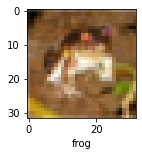

In [ ]:
plot_sample(X_train,y_train, 0)

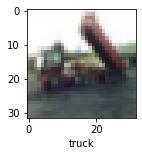

In [ ]:
plot_sample(X_train,y_train, 2)

In [ ]:
X_train=X_train/255
X_test=X_test/255

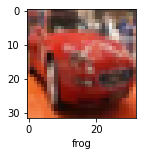

In [ ]:
plot_sample(X_test,y_test, 5)

In [ ]:
ann = models.Sequential([
                         layers.Flatten(input_shape=(32,32,3)),
                         layers.Dense(3000, activation='relu'),
                         layers.Dense(1000, activation='relu'),
                         layers.Dense(10, activation='relu'),
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 12s 6ms/step - loss: 13.5858 - accuracy: 0.1000
Epoch 2/5
1563/1563 [==============================] - 9s 6ms/step - loss: 13.5876 - accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 9s 6ms/step - loss: 13.5876 - accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 9s 6ms/step - loss: 13.5876 - accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 9s 6ms/step - loss: 13.5876 - accuracy: 0.1000


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.10      1.00      0.18      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 13.5876 - accuracy: 0.1000


[13.587629318237305, 0.10000000149011612]

In [ ]:
cnn = models.Sequential([
                         #cnn
                         layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
                         layers.MaxPooling2D((2,2)),

                         layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
                         layers.MaxPooling2D((2,2)),

                         #dense
                         layers.Flatten(),
                         layers.Dense(64, activation='relu'),
                         layers.Dense(10, activation='softmax'),
])


In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 35s 6ms/step - loss: 1.4546 - accuracy: 0.4796
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1102 - accuracy: 0.6102
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9814 - accuracy: 0.6568
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8983 - accuracy: 0.6863
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8311 - accuracy: 0.7116
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7805 - accuracy: 0.7303
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7317 - accuracy: 0.7448
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6874 - accuracy: 0.7614
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6467 - accuracy: 0.7754
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.61

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9076 - accuracy: 0.7003


[0.9076232314109802, 0.7002999782562256]

In [ ]:
y_pred=cnn.predict(X_test)
y_pred[:5]

array([[1.7007394e-03, 1.9424952e-03, 3.4462485e-02, 7.3030484e-01,
        2.5219014e-03, 1.2019356e-01, 6.8867475e-02, 9.1445865e-04,
        3.6377668e-02, 2.7143341e-03],
       [5.7966087e-04, 1.8909307e-01, 6.9789407e-06, 1.2442659e-05,
        2.3419946e-06, 3.5566615e-07, 5.9222319e-08, 2.1875566e-07,
        8.0763310e-01, 2.6718262e-03],
       [7.0174880e-02, 4.4060785e-02, 7.3102704e-04, 3.8846442e-03,
        4.0315726e-04, 1.7635830e-04, 4.0344476e-05, 7.5699080e-04,
        8.6366439e-01, 1.6107460e-02],
       [7.0025879e-01, 4.3697669e-03, 4.6773129e-03, 4.1410173e-03,
        9.3044288e-02, 5.0079159e-04, 4.7605397e-05, 1.3194028e-02,
        1.7505307e-01, 4.7132922e-03],
       [1.8045446e-06, 1.4504205e-07, 8.8892721e-02, 3.1694872e-03,
        8.4532404e-01, 4.9018691e-04, 6.2120151e-02, 3.0350103e-07,
        1.0730420e-06, 3.5455312e-08]], dtype=float32)

In [ ]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

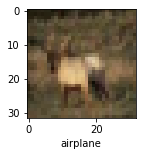

In [ ]:
plot_sample(X_test,y_test,3)

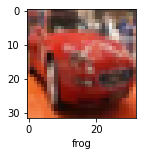

In [ ]:
plot_sample(X_test,y_test, 5)

In [ ]:
classes[y_classes[3]]

'airplane'

In [ ]:
classes[y_classes[5]]

'frog'

In [ ]:
print("Classification Report : \n", classification_report(y_test,y_classes))

Classification Report : 
               precision    recall  f1-score   support

           0       0.73      0.72      0.73      1000
           1       0.89      0.74      0.81      1000
           2       0.57      0.64      0.60      1000
           3       0.55      0.45      0.50      1000
           4       0.61      0.71      0.66      1000
           5       0.57      0.66      0.61      1000
           6       0.84      0.70      0.76      1000
           7       0.80      0.72      0.76      1000
           8       0.77      0.83      0.80      1000
           9       0.75      0.81      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

